In [36]:
n = 0

while True:
  n = int(input('Enter the number of qubits: '))
  if n < 1:
    print('Number of qubits has to be at least 1')
    continue
  
  print(f'Number of qubits entered = {n}')
  break

Number of qubits entered = 2


Available gates: X, H, CX (CNOT), Z, S, T
Original Circuit:


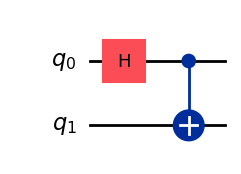

In [26]:
from qiskit import QuantumCircuit

qc_original = QuantumCircuit(n)

print("Available gates: X, H, CX (CNOT), Z, S, T")

while True:
      gate = input("Enter the gate to apply (or type 'done' to finish): ").upper()
      if gate == 'DONE':
          break
      
      if gate in ['X', 'H', 'Z', 'S', 'T']:
          qubit = int(input(f"Enter the qubit (0 to {n - 1}) for the {gate} gate: "))
          if gate == 'X':
              qc_original.x(qubit)
          elif gate == 'H':
              qc_original.h(qubit)
          elif gate == 'Z':
              qc_original.z(qubit)
          elif gate == 'S':
              qc_original.s(qubit)
          elif gate == 'T':
              qc_original.t(qubit)
      
      elif gate == 'CX':
          control_qubit = int(input(f"Enter the control qubit (0 to {n - 1}) for the CX gate: "))
          target_qubit = int(input(f"Enter the target qubit (0 to {n - 1}) for the CX gate: "))
          qc_original.cx(control_qubit, target_qubit)
      
      else:
          print("Invalid gate. Please choose from the available options.")

print('Original Circuit:')
display(qc_original.draw('mpl'))

In [28]:
import random

def obfuscate_circuit(circuit, num_pairs=5):
    obfuscated_circuit = circuit.copy()

    qubits = circuit.qubits
    num_qubits = len(qubits)

    for _ in range(num_pairs):
        for qubit_idx in range(num_qubits):
            gate_choice = random.choice(['x', 'h', 'z', 'cx', 'swap'])
            
            if gate_choice == 'x':
                obfuscated_circuit.x(qubit_idx)
                obfuscated_circuit.x(qubit_idx)
                
            elif gate_choice == 'h':
                obfuscated_circuit.h(qubit_idx)
                obfuscated_circuit.h(qubit_idx)
                
            elif gate_choice == 'z':
                obfuscated_circuit.z(qubit_idx)
                obfuscated_circuit.z(qubit_idx)

            elif gate_choice == 'cx' and num_qubits > 1:
                target_idx = (qubit_idx + 1) % num_qubits
                obfuscated_circuit.cx(qubit_idx, target_idx)
                obfuscated_circuit.cx(qubit_idx, target_idx)

            elif gate_choice == 'swap' and num_qubits > 1:
                target_idx = (qubit_idx + 1) % num_qubits
                obfuscated_circuit.swap(qubit_idx, target_idx)
                obfuscated_circuit.swap(qubit_idx, target_idx)

    return obfuscated_circuit

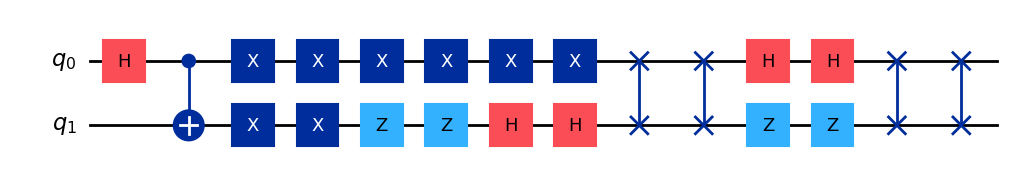

In [29]:
qc_obfuscated = obfuscate_circuit(qc_original)
display(qc_obfuscated.draw('mpl'))

In [30]:
from qiskit import transpile
from qiskit_aer import AerSimulator

def simulate_circuit(circuit):
    simulator = AerSimulator()
    compiled_circuit = transpile(circuit, simulator)
    result = simulator.run(compiled_circuit).result()
    counts = result.get_counts(compiled_circuit)
    return counts

def verify_correctness(original_circuit, obfuscated_circuit):
    original_circuit.measure_all()
    obfuscated_circuit.measure_all()

    original_counts = simulate_circuit(original_circuit)
    obfuscated_counts = simulate_circuit(obfuscated_circuit)

    print("Original Circuit Measurement Results:", original_counts)
    print("Obfuscated Circuit Measurement Results:", obfuscated_counts)

    display(qc_original.draw('mpl'))
    display(qc_obfuscated.draw('mpl'))

Original Circuit Measurement Results: {'00': 508, '11': 516}
Obfuscated Circuit Measurement Results: {'11': 509, '00': 515}


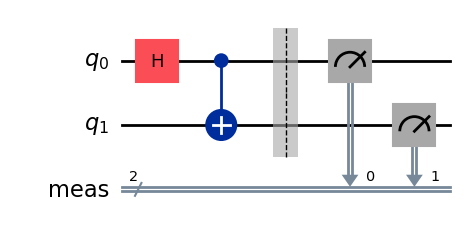

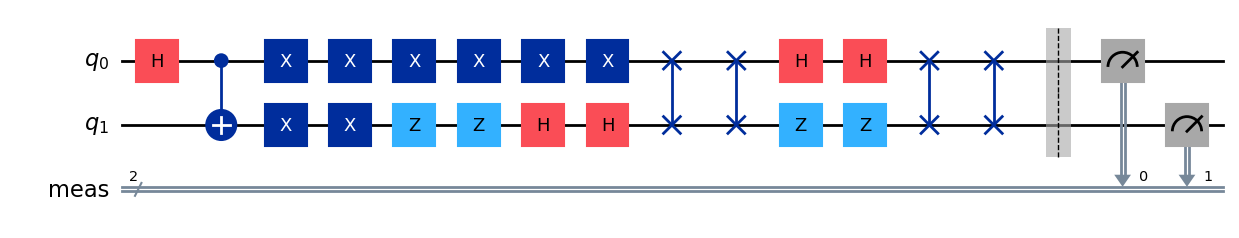

In [31]:
verify_correctness(qc_original, qc_obfuscated)